# Tugas Praktikum

In [11]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/insurance.csv")

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


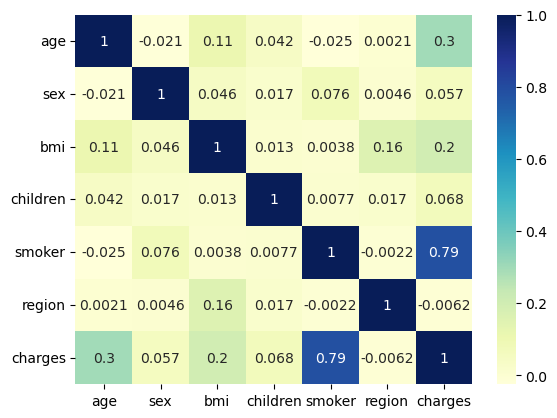

In [4]:
# Melakukan visualisasi heatmap & encoding feature ordinal untuk melihat korelasi antar feature

le = LabelEncoder()

df_ordinal = df.select_dtypes(include=['object']).columns
# df_ordinal = df.select_dtypes(include=['object']).columns digunakan untuk mengambil kolom yang bertipe data object

for column in df_ordinal:
    df[column] = le.fit_transform(df[column])
# for column in df_ordinal: digunakan untuk melakukan iterasi pada setiap kolom yang bertipe data object
# df[column] = le.fit_transform(df[column]) digunakan untuk mengubah data object menjadi data numerik
    
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()
# sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) digunakan untuk membuat visualisasi heatmap dari korelasi antar feature

Berdasarkan heatmap di atas, kita dapat mengidentifikasi variabel bebas dan variabel target berdasarkan tingkat korelasinya sebagai berikut:
- Variabel Target: charges
- Variabel Bebas Korelasi Kuat: smoker, age, bmi
- Variabel Bebas Korelasi Lemah: children, sex, region

In [6]:
kolom = ['age', 'bmi',  'smoker']

# Membuat variabel bebas X dan Y
x = df[kolom]
y = df['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [7]:
# Pembagian data latih dan data uji dengan proporsi 80% : 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

3. Lakukan feature scaling jika diperlukan.

In [8]:
# Label Encoding untuk kolom 'smoker'
label_encoder = LabelEncoder()

df['smoker'] = label_encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)

x_test = sc_x.fit_transform(x_test)

print("x_train:\n", x_train)
print("x_test:\n", x_test)

x_train:
 [[ 0.47222651 -1.75652513 -0.50874702]
 [ 0.54331294 -1.03308239 -0.50874702]
 [ 0.8987451  -0.94368672 -0.50874702]
 ...
 [ 1.3252637  -0.89153925 -0.50874702]
 [-0.16755139  2.82086429  1.96561348]
 [ 1.1120044  -0.10932713 -0.50874702]]
x_test:
 [[ 4.58595847e-01 -9.37151877e-01 -5.02331015e-01]
 [-1.87132806e-01 -1.67526789e-01 -5.02331015e-01]
 [ 1.82180078e+00 -6.65519493e-01  1.99071921e+00]
 [ 5.30343476e-01 -8.46607749e-01 -5.02331015e-01]
 [-1.40684249e+00  1.34286971e-01  1.99071921e+00]
 [-3.30628063e-01  1.87845280e+00 -5.02331015e-01]
 [-1.40684249e+00 -1.35969114e+00 -5.02331015e-01]
 [ 1.82180078e+00  1.08500031e+00 -5.02331015e-01]
 [-7.61113832e-01 -2.18967898e+00 -5.02331015e-01]
 [ 7.45586360e-01 -3.78796421e-01 -5.02331015e-01]
 [-6.17618576e-01 -1.06026012e+00  1.99071921e+00]
 [ 1.71605335e-01 -7.69826613e-02 -5.02331015e-01]
 [-6.89366204e-01 -2.35832008e-01 -5.02331015e-01]
 [ 5.30343476e-01  1.79108566e+00  1.99071921e+00]
 [ 1.53481027e+00  1.563931

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [12]:
y_pred = model.predict(x_test)

x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          1.65e-310
Time:                        19:56:29   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.904     71.026      0.0

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE Score : {mse}')
print(f'MAE Score : {mae}')
print(f'R2 Score : {r2_score}')

MSE Score : 34546862.33706372
MAE Score : 4254.547761930496
R2 Score : 0.7774741087730282
